# ML training and testing

In [19]:

import pandas as pd
import numpy as np
import joblib
from scipy import sparse

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:

X_train = sparse.load_npz("../data/data_ml/X_train.npz")
X_test = sparse.load_npz("../data/data_ml/X_test.npz")
y_train = pd.read_csv("../data/data_ml/y_train.csv").squeeze("columns")
y_test = pd.read_csv("../data/data_ml/y_test.csv").squeeze("columns")

print("Data loaded successfully!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data loaded successfully!
X_train shape: (943, 9165)
y_train shape: (943,)
X_test shape: (236, 9165)
y_test shape: (236,)


In [21]:
#Function to evaluate and print model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [22]:
#Function to compare multiple models
def compare_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")
    return results

## First round of training

c:\Users\david\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:03:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluating Logistic Regression...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53       118
           1       0.52      0.49      0.51       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



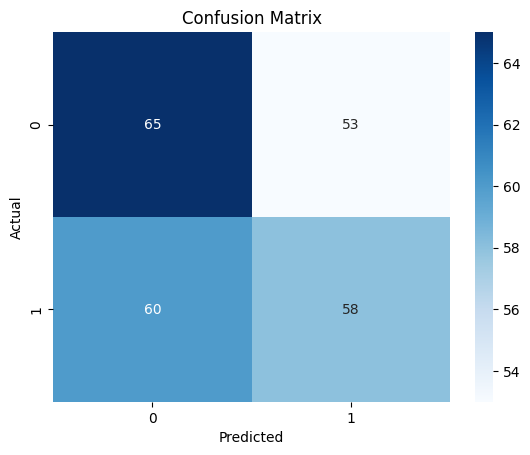

Evaluating Decision Tree...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       118
           1       0.52      0.50      0.51       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



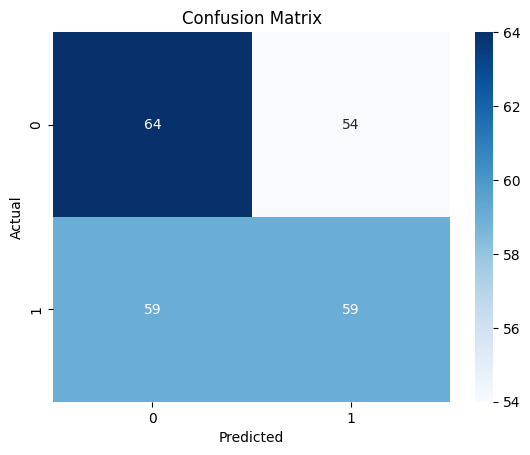

Evaluating K-Nearest Neighbors...
Accuracy: 0.5254237288135594
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51       118
           1       0.52      0.55      0.54       118

    accuracy                           0.53       236
   macro avg       0.53      0.53      0.53       236
weighted avg       0.53      0.53      0.53       236



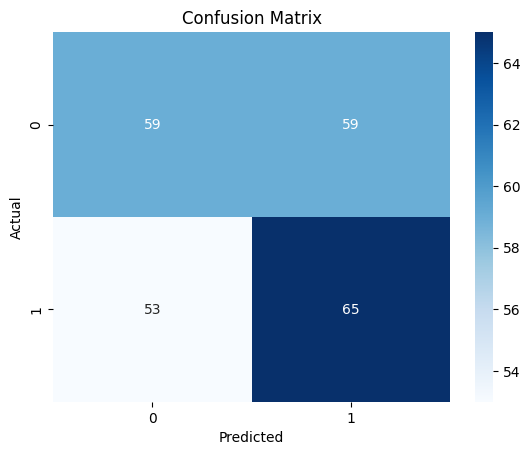

Evaluating Random Forest...
Accuracy: 0.5254237288135594
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       118
           1       0.52      0.58      0.55       118

    accuracy                           0.53       236
   macro avg       0.53      0.53      0.52       236
weighted avg       0.53      0.53      0.52       236



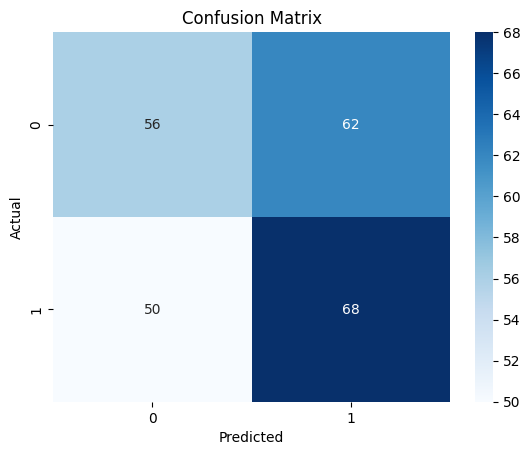

Evaluating Support Vector Machine...
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.50      1.00      0.67       118

    accuracy                           0.50       236
   macro avg       0.25      0.50      0.33       236
weighted avg       0.25      0.50      0.33       236



C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

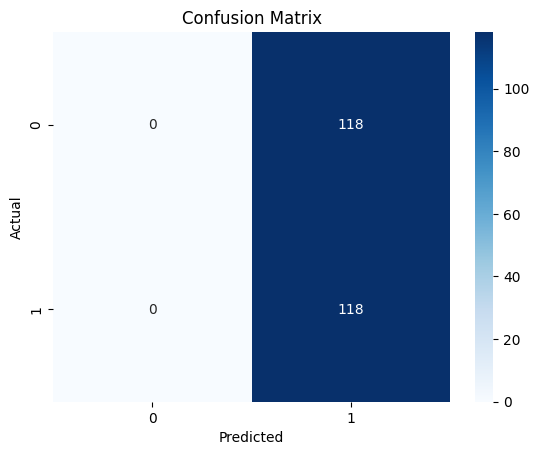

Evaluating XGBoost...
Accuracy: 0.5211864406779662
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52       118
           1       0.52      0.53      0.52       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



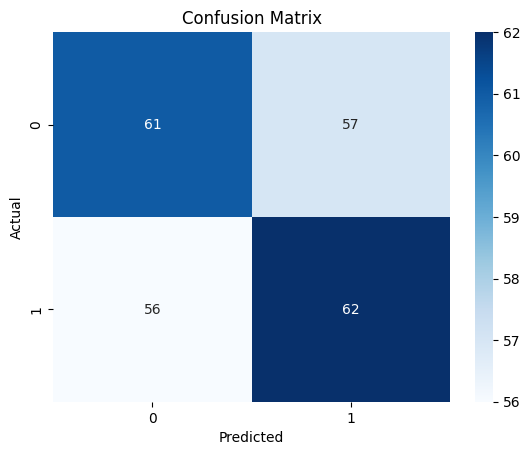

Logistic Regression Accuracy: 0.5212
Decision Tree Accuracy: 0.5212
K-Nearest Neighbors Accuracy: 0.5254
Random Forest Accuracy: 0.5254
Support Vector Machine Accuracy: 0.5000
XGBoost Accuracy: 0.5212


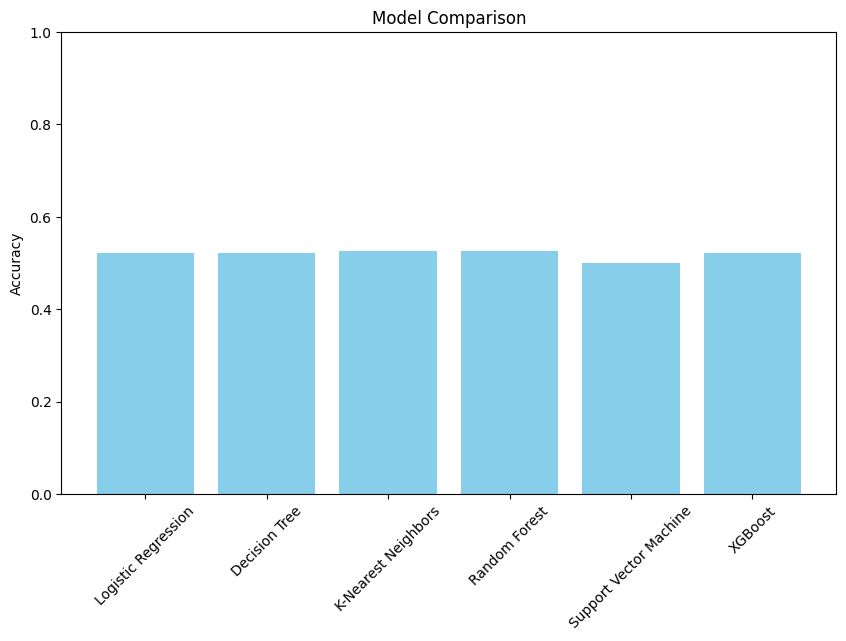

In [23]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, X_test, y_test)


results = compare_models(models, X_test, y_test)

#Graphical comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

We can conclude that base models perform very poorly